In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Introduction to regression

Using Boston housing data

In [2]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Creat feature and target arrays

In [3]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

**Predicting house value from a single feature**

Using number of rooms RM

In [6]:
X[0:5,5]

array([6.575, 6.421, 7.185, 6.998, 7.147])

In [7]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
print("Currrent y shape ",y.shape)
print("Currrent X_rooms shape ",X_rooms.shape)

Currrent y shape  (506,)
Currrent X_rooms shape  (506,)


In [10]:
y=y.reshape(-1,1)
X_rooms= X_rooms.reshape(-1,1)

print("Adjusted y shape ",y.shape)
print("Adjusted X_rooms shape ",X_rooms.shape)

Adjusted y shape  (506, 1)
Adjusted X_rooms shape  (506, 1)


To check for correlation, plotting house value vs number of rooms.

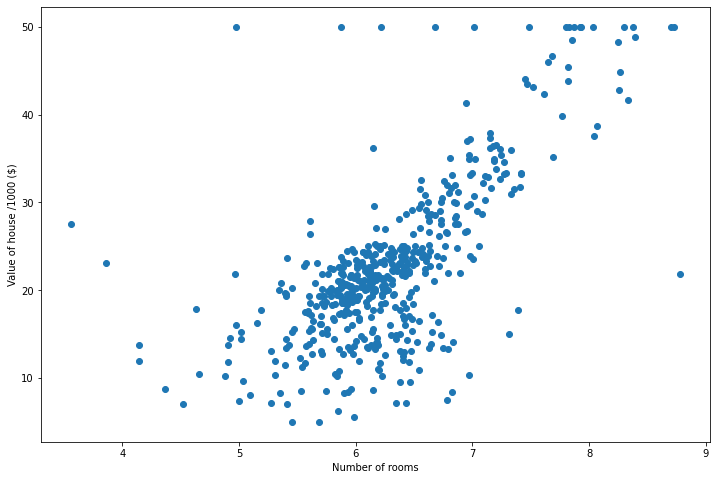

In [12]:
fig=plt.figure(figsize=(12,8))
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [13]:
boston[['RM','MEDV']].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


As seen from the graph and thecorrelation values, they are correlated

## Fitting a regression model

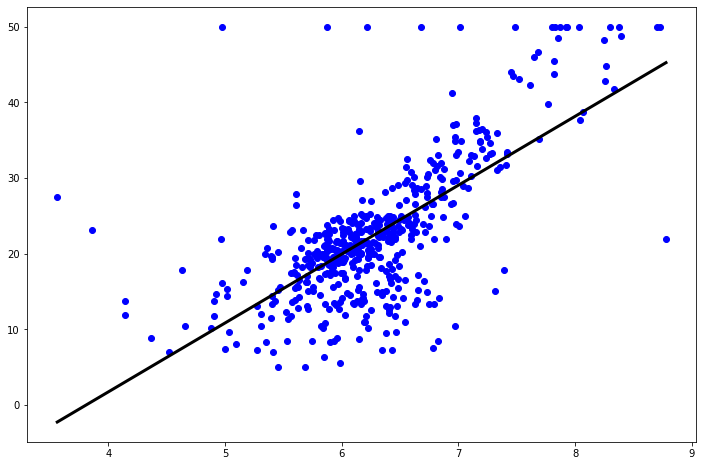

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)

# check out the regressor's prediction over the range of the data
# We can achieve that by using np linspace between the maximum and minimum number of rooms and make a prediction for this data.
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
fig=plt.figure(figsize=(12,8))

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
color='black', linewidth=3)
plt.show()

### Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [27]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

In [30]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


### Exploring the Gapminder data

As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

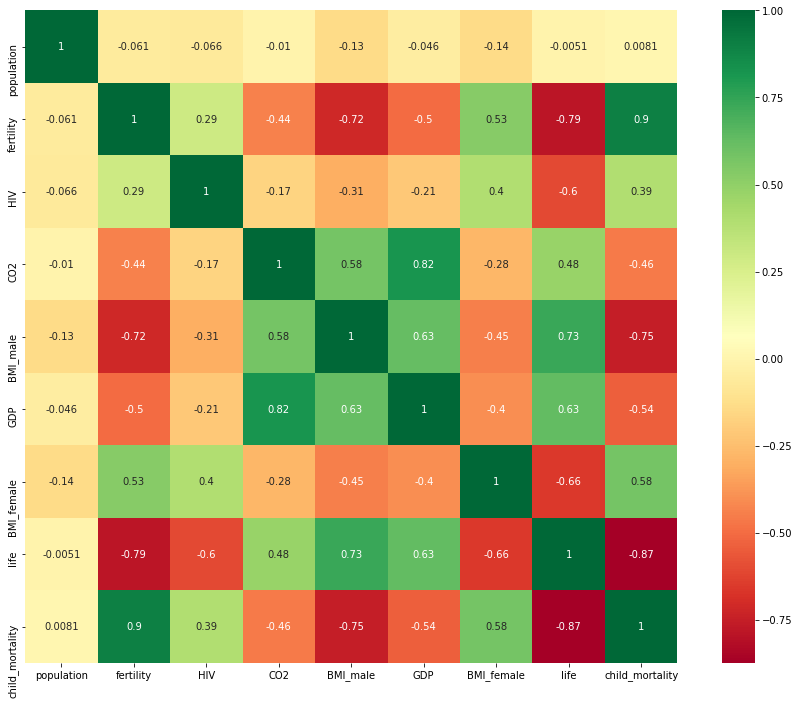

In [36]:
import seaborn as sns

fig=plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn',annot=True)
plt.show()

In [38]:
df.shape

(139, 10)

In [39]:
df[['life','fertility']].corr()

,life,fertility
life,1.000000,-0.786921
fertility,-0.786921,1.000000


In [37]:
df[['life']].mean()

life    69.602878
dtype: float64

In [44]:
df.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [45]:
df[['life','GDP']].corr()

,life,GDP
life,1.000000,0.628999
GDP,0.628999,1.000000


## Basics of Linear Regression

The default scoring method for linear regression is called R squared. Intuitively, this metric quantifies the amount of variance in the target variable that is predicted from the feature variables.

Note that generally you will never use linear regression out of the box like this; you will most likely wish to use regularization, which we'll see soon and which places further constraints on the model coefficients.

### Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the  score using scikit-learn's .score() method.

In [49]:
X.shape

(139,)

0.6192442167740035


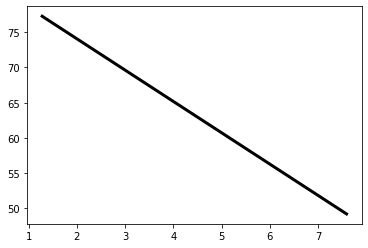

In [55]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_reshaped), max(X_reshaped)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_reshaped,y_reshaped)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_reshaped, y_reshaped))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


In [53]:
X_reshaped[0:5]

array([[2.73],
       [6.43],
       [2.24],
       [1.4 ],
       [1.96]])

In [54]:
y_reshaped[0:5]

array([[75.3],
       [58.3],
       [75.5],
       [72.5],
       [81.5]])

### Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the  score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

In [57]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [64]:
df.drop('life',axis=1).values.reshape(-1,9).shape

(139, 9)

In [62]:
df.shape

(139, 10)

In [69]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [71]:
df.drop(['life','Region'],axis=1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2
...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,13.0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,49.2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,26.2
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,94.9


In [72]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X=df.drop(['life','Region'],axis=1).values.reshape(-1,8)
y=df['life'].values.reshape(-1,1)
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430134
Root Mean Squared Error: 3.2476010800369464


### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses $R^2$ as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

In [73]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793451



## K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.

In [74]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782622265
0.8436128620131272


### Regularized regression

**Ridge regression**

* $a_i^2$ squared value of each coefficient.
  
Loss function = OLS loss function + ($\alpha * \sum_{i=1}^n a_i^2$)

**Lasso regression**

* $|a_i|$ is the absolute value of each coefficient.
  
Loss function = OLS loss function + $\alpha * \sum_{i=1}^n |a_i|$

**Lasso regression for feature selection**

* Can be used to select important features of a dataset.
* The features that are not shrunk to zero are selected by the lasso algorithm.

#### Regularization I: Lasso

In the slide, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

In [75]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')

In [76]:
df.drop('life', axis=1).columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region'],
      dtype='object')

In [78]:
X.shape

(139, 8)

In [84]:
len(df_columns)

9

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


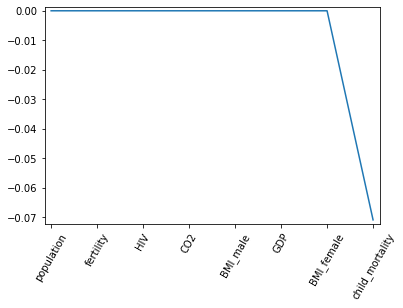

In [86]:
# Import Lasso
from sklearn.linear_model import Lasso

df_columns= df.drop(['life','Region'], axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()


According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the  norm of the L1 coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function that we have defined for you, which plots the $R^2$ score as well as standard error for each alpha:

The motivation behind this exercise is for you to see how the $R^2$ score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

In [87]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)

In [88]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

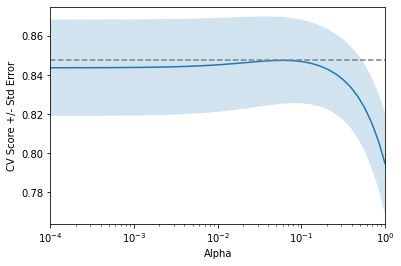

In [89]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
#alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!